<a href="https://colab.research.google.com/github/rnjsdn12332/GAN_study/blob/main/ANN(image_recovery).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch
import pickle #파이썬 객체를 파일 형태로 저장할 때 쓰는 파이썬에서 제공하는 기본 패키지
import matplotlib.pyplot as plt


broken_image=torch.FloatTensor(pickle.load(open('drive/MyDrive/Colab Notebooks/myo_gan/0714/broken_image_t.p', 'rb'), encoding='latin1'))

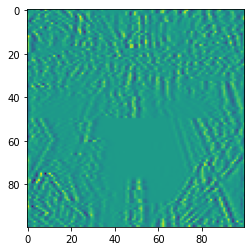

In [48]:
plt.imshow(broken_image.view(100,100))

In [72]:
#이미지를 오염시키는 함수

def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

    #가설 텐서와 오염된 이미지 사이의 계산 함수
def distance_loss(h, broken_image) : 
    return torch.dist(h, broken_image)


In [73]:
lr=0.8
random_tensor=torch.randn(10000, dtype=torch.float) #(100,100)모양의 행렬을 [10000]모양의 벡터로 표현
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():  #파이토치의 자동 기울기 계산 비활성화
        random_tensor = random_tensor - lr*random_tensor.grad #random_tensor.grad에는 loss가 최댓점이 되는 곳의 방향이 들어있음. 이 방향의 반대쪽으로 random_tensor를 학습률만큼 이동시킴
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))



Loss at 0 = 12.096868515014648
Loss at 1000 = 1.1754623651504517
Loss at 2000 = 0.5568842887878418
Loss at 3000 = 0.38210684061050415
Loss at 4000 = 0.30194374918937683
Loss at 5000 = 0.25408121943473816
Loss at 6000 = 0.22019170224666595
Loss at 7000 = 0.19335989654064178
Loss at 8000 = 0.17054487764835358
Loss at 9000 = 0.1502360701560974
Loss at 10000 = 0.13160154223442078
Loss at 11000 = 0.11414334177970886
Loss at 12000 = 0.09754517674446106
Loss at 13000 = 0.08159611374139786
Loss at 14000 = 0.06615158915519714
Loss at 15000 = 0.05110905319452286
Loss at 16000 = 0.03639667481184006
Loss at 17000 = 0.0219663605093956
Loss at 18000 = 0.021162385120987892
Loss at 19000 = 0.02116626687347889


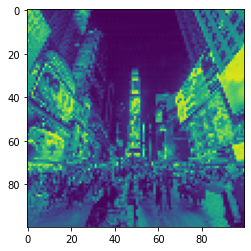

In [74]:
plt.imshow(random_tensor.view(100,100).data)